## Exploratory Data Analysis

***

##### All of the visualisations of graphical representations for Mini Project 1 will be recorded here

***

## -- *From Data Profiling notebook* --

- ## *import packages*

In [7]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [8]:
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)

Numpy:  1.26.4
Pandas:  2.1.4


In [9]:
conn = sqlite3.connect('healthcare.db')

In [10]:
# assign data frame name to "df" and store it with observed data
df = pd.read_csv(r'C:\Users\3sthe\Documents\MINI_PROJECT_1\employee-attrition-for-healthcare\watson_healthcare_modified.csv')

# Write DataFrame to SQLite using connection 'conn'
df.to_sql('healthcare', conn, if_exists='replace', index = False)

# 
cursor = conn.cursor()

# Query data from SQLite table
query = """
SELECT *
FROM healthcare;
"""
# assign new data frame name to "df_from_sql" and use the query to load df table into df_from_sql
df_from_sql = pd.read_sql_query(query, conn)

In [11]:
# dropping multiple columns from a DataFrame
columns_to_drop = ['EmployeeID', 'Age', 'Gender', 'DistanceFromHome', 'MaritalStatus', 
                   'OverTime', 'Shift', 'BusinessTravel', 'DailyRate', 'HourlyRate', 
                   'MonthlyRate', 'PercentSalaryHike', 'EnvironmentSatisfaction', 
                   'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
                   'RelationshipSatisfaction', 'WorkLifeBalance', 
                   'YearsSinceLastPromotion', 'YearsWithCurrManager', 
                   'EmployeeCount', 'Over18', 'StandardHours']

df_main = df_from_sql.drop(columns=columns_to_drop)

In [12]:
# finding the Administrative values in the original df with a condition 'con'
con = (df_from_sql['JobRole']== 'Administrative')

# finding the Admin values in the original df with a condition 'con'
con = (df_from_sql['JobRole']== 'Admin')

In [13]:
# Define a mapping dictionary for merging categories
merge_map = {
    'Administrative': 'Admin'
}

# Use replace method with the mapping dictionary
df_main['JobRole'] = df_main['JobRole'].replace(merge_map)

In [14]:
# Renaming columns
df_main.rename(columns={'Education': 'LevelOfEducation', 'TrainingTimesLastYear': 'DaysOfTrainingLastYear'}, inplace=True)

In [15]:
# Change all 0 values in 'NumCompaniesWorked' to 1
df_main['NumCompaniesWorked'] = df_main['NumCompaniesWorked'].replace(0, 1)

- # 1. Exploring the distribution of key features
***
- #### Pro Tips:
 - #### 1.Normalisation
    - ##### *Purpose: Normalization facilitates easier comparison and analysis of variables with different scales by minimizing the impact of extreme values and ensuring all features contribute equally to the analysis.*
    - ##### *Improves Model Performance: Many machine learning algorithms perform better or converge faster when input features are on a similar scale.*
    - ##### *Facilitates Interpretation: Normalization can make data more interpretable, especially when comparing features with different units or scales.*
    - ##### *Prevents Bias: Algorithms that rely on distance metrics or use regularization can be biased towards features with larger ranges if not normalized.*
 - #### 2. Standardization (Z-score Normalization)
    - ##### *Standardization rescales data to have a mean of 0 and a standard deviation of 1.*

- ## 1.a. creating a plot that gives insight into key feature Education Field

In [18]:
# using .groupby() and .value_counts() and normalise = 'True' to get a percentage of attrition per education field
dfEducationField = df_main.groupby(['EducationField'])['Attrition'].value_counts(normalize= True).unstack()

# reset the index in order to access the Education column
df_reset = dfEducationField.reset_index()
# observing normalised data as a percentage
print(df_reset)

Attrition    EducationField        No       Yes
0           Human Resources  0.793103  0.206897
1             Life Sciences  0.879484  0.120516
2                 Marketing  0.851852  0.148148
3                   Medical  0.902672  0.097328
4                     Other  0.909091  0.090909
5          Technical Degree  0.852349  0.147651


Text(0.5, 1.0, '2022 Attrition at Watson Health Care')

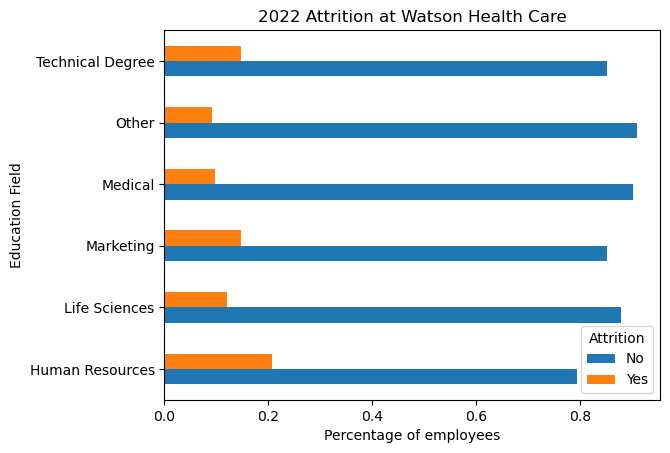

In [19]:
# plotting a horizontal bar chart
df_reset.plot.barh(x = 'EducationField', y = ['No', 'Yes'])
plt.xlabel('Percentage of employees')
plt.ylabel('Education Field')
plt.title('2022 Attrition at Watson Health Care')

- #### Insight:
    - ##### According to the 2022 Attrition at Watson Health Care horizontal bar chart, the normalised distribution of data for each education field exposes the significant difference between the percentage of employees who turned over ('Attrition = Yes') and those who stayed on board
    - ##### Interestingly, less than 0.2% of employees left Watson Health Care from each field of education
- ##### Further analysis later on in the notebook 

- ## 1.b. creating plots that gives insight into key feature Job Role

Text(0.5, 1.0, '2022 Attrition at Watson Health Care')

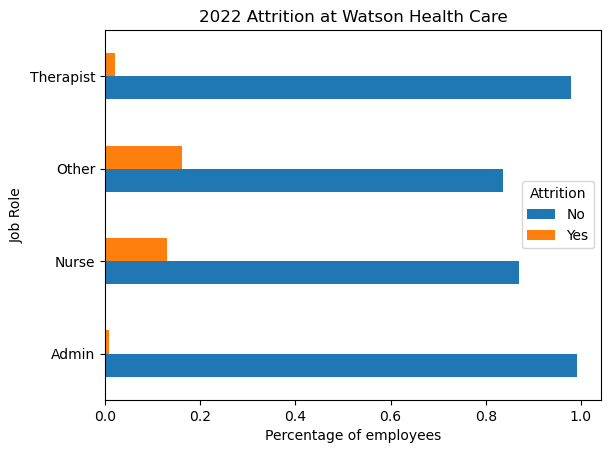

In [22]:
# use groupby() to create a normalised plot that gives insight into key feature Job Role against Attrition
dfJobRole = df_main.groupby(['JobRole'])['Attrition'].value_counts(normalize= True).unstack()

# reset the index in order to access the Job Role column
df_reset2 = dfJobRole.reset_index()

# building a horizontal bar chart
df_reset2.plot.barh(x = 'JobRole', y = ['No', 'Yes'])
plt.xlabel('Percentage of employees')
plt.ylabel('Job Role')
plt.title('2022 Attrition at Watson Health Care')

##### *Normalising the JobRole feature reveals that for Attrition = Yes: Nurse and Other have greater number of employees than Therapist and Admin*

- #### Insight:
    - ##### According to the 2022 Attrition at Watson Health Care horizontal bar chart, the normalised distribution of data for each Job Role reveals there are greater percentages of Nurses and Other employees 
- ##### Further analysis later on in the notebook 

- ## 1.c. creating plots that give insight into key feature Monthly Income

#### CHECK FOR OUTLIERS:

##### Observing a box plot

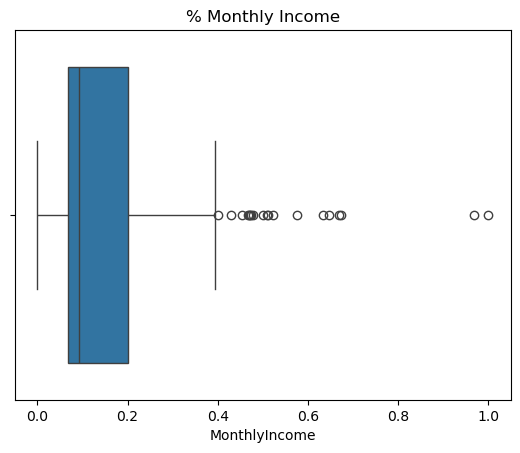

In [28]:
# Filter data for Attrition == 'Yes'
filtered_data_Yes = df_main.query("Attrition == 'Yes'")

# Apply Min-Max normalization to MonthlyIncome
scaler = MinMaxScaler()
filtered_MonthlyIncome_normalized = pd.DataFrame(scaler.fit_transform(filtered_data_Yes[['MonthlyIncome']]), 
                                        columns=['MonthlyIncome'])

# Plotting a boxplot can visually identify outliers as points beyond the whiskers (usually 1.5 times the IQR).
sns.boxplot(x=filtered_MonthlyIncome_normalized['MonthlyIncome'])

## setting a title for better interpretation
plt.title('% Monthly Income')
plt.show()

#### REASONS FOR NOT REMOVING OUTLIERS:

##### Loss of Information: Outliers, while potentially anomalous, can sometimes carry valuable information or insights about the underlying data 
##### distribution or specific conditions in the dataset. Removing outliers may lead to a loss of this valuable information.

##### Impact on Statistical Significance: Outliers can significantly impact statistical measures such as mean, variance, and correlation coefficients. ##### Removing outliers can distort these measures and may lead to incorrect conclusions about relationships within the data.

##### Reduced Model Robustness: In machine learning and statistical modeling, outlier removal can lead to overfitting if the model becomes too 
##### specialized to the cleaned data. Models trained without outliers may perform poorly on new, unseen data that includes outliers.

##### Biased Analysis: If outliers are not truly errors but rather genuine extreme values in the data, their removal can bias the analysis and the ##### conclusions drawn from it. This bias can affect decision-making processes based on the analysis.

##### Ethical Considerations: In certain domains, such as medical research or finance, outliers may represent critical data points that have real-world ##### implications. Removing such outliers without careful consideration can lead to unethical or inaccurate results.

##### Difficulty in Defining Outliers: Determining what constitutes an outlier can be subjective and may vary based on the context of the analysis. ##### Different methods of outlier detection (e.g., statistical methods, domain knowledge) can yield different results.

#### REASONS FOR MANIPULATING THE OUTLIERS:

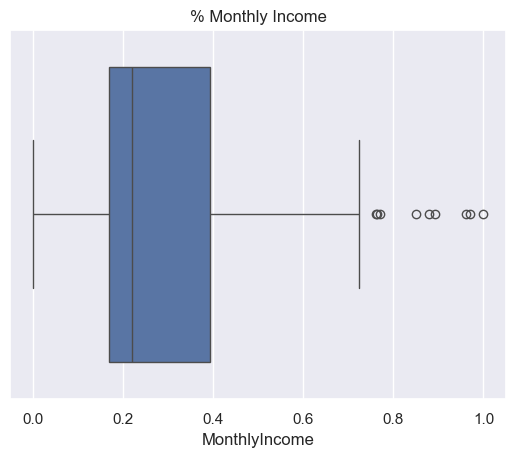

In [91]:
# Filter data for Attrition == 'Yes'
filtered_data_Yes = df_main.query("Attrition == 'Yes'")

# Define function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'MonthlyIncome' column
filtered_data_Yes = remove_outliers(filtered_data_Yes, 'MonthlyIncome')

# Apply Min-Max normalization to MonthlyIncome
scaler = MinMaxScaler()
filtered_MonthlyIncome_normalized = pd.DataFrame(scaler.fit_transform(filtered_data_Yes[['MonthlyIncome']]), 
                                        columns=['MonthlyIncome'])

# Plotting a boxplot can visually identify outliers as points beyond the whiskers (usually 1.5 times the IQR).
sns.boxplot(x=filtered_MonthlyIncome_normalized['MonthlyIncome'])

## setting a title for better interpretation
plt.title('% Monthly Income')
plt.show()

##### Remove Outliers Function: remove_outliers function removes outliers from the 'MonthlyIncome' column using the Interquartile Range (IQR) method. Outliers are defined as values outside 1.5 times the IQR (Interquartile Range) from the first and third quartiles.
##### By removing outliers, the stripplot becomes more focused on the central trend and distribution of 'MonthlyIncome' across different values of  'YearsAtCompany', providing a clearer insight into their relationship without the influence of extreme values

#### There are still extreme values present which could be a result of key features Level of Education (the higher the qualification, the more they will earn) and Years At Company as observed further on in 2.e. and 2.f.

- # 2. Exploring the relationship between key features
***
- #### Pro Tip:
 - #### Reduce noise
    - ##### *Reducing noise will make plots and graphs easier to interpret*

- ## 2.a. creating plots that give insight into key features Days of Training Last year and Job Roles:
    - ### Nurse (RN)

C:\Users\3sthe\AppData\Local\Temp\ipykernel_20136\1252181070.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = filtered_df, x = 'TrainingTimesLastYear',


Text(0.5, 1.0, 'RN from all fields of education')

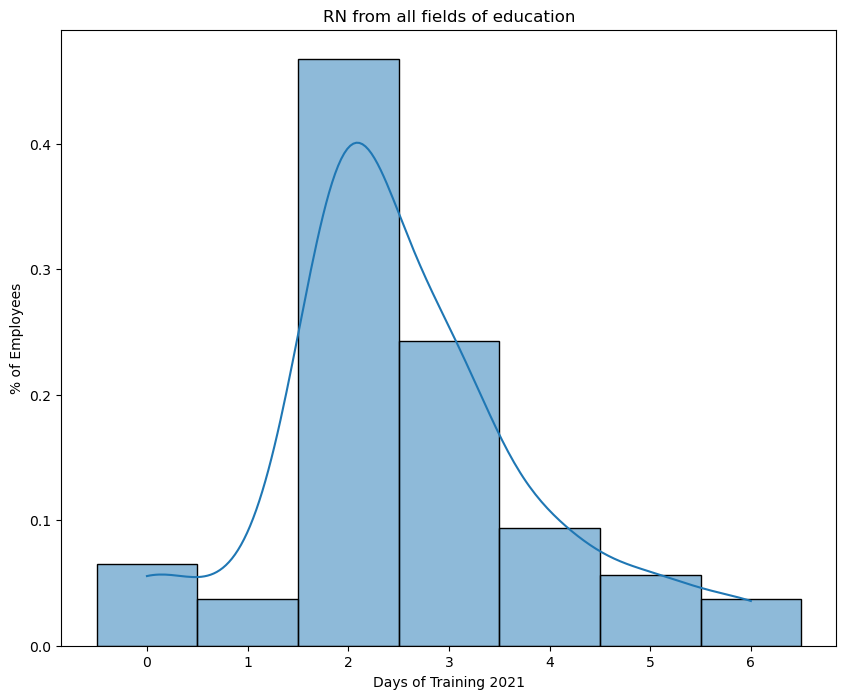

In [33]:
# setting up conditions for access into feature JobRole to get observations of all Nurses
nurse_condition = df_main['JobRole'] == 'Nurse'
training_condition = df_main['DaysOfTrainingLastYear'] >= 0
education_condition = df_main['LevelOfEducation'] >= 0
attrition_condition = df_main['Attrition'] >= 'Yes'

# creating a filtered data frame
filtered_df = df_from_sql[nurse_condition & training_condition & education_condition & attrition_condition]

# figure(size, resolution) of the window that the resulting plot will fit into
plt.figure(figsize=(10,8))

# create a histogram using kde = True and stat = 'density'
sns.histplot(data = filtered_df, x = 'TrainingTimesLastYear', 
             discrete = True, stat='density', kde=True, palette = 'Set2')
plt.xlabel('Days of Training 2021')
plt.ylabel('% of Employees')
plt.title('RN from all fields of education')

- ### Insight: Right-Skewed (positive) and Right tailed Distribution

- ## 2.b. creating plots that give insight into key features Days of Training Last year and Job Roles:
 - ### Other

C:\Users\3sthe\AppData\Local\Temp\ipykernel_20136\2385123057.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = filtered_df2, x = 'TrainingTimesLastYear',


Text(0.5, 1.0, 'Other from all fields of education')

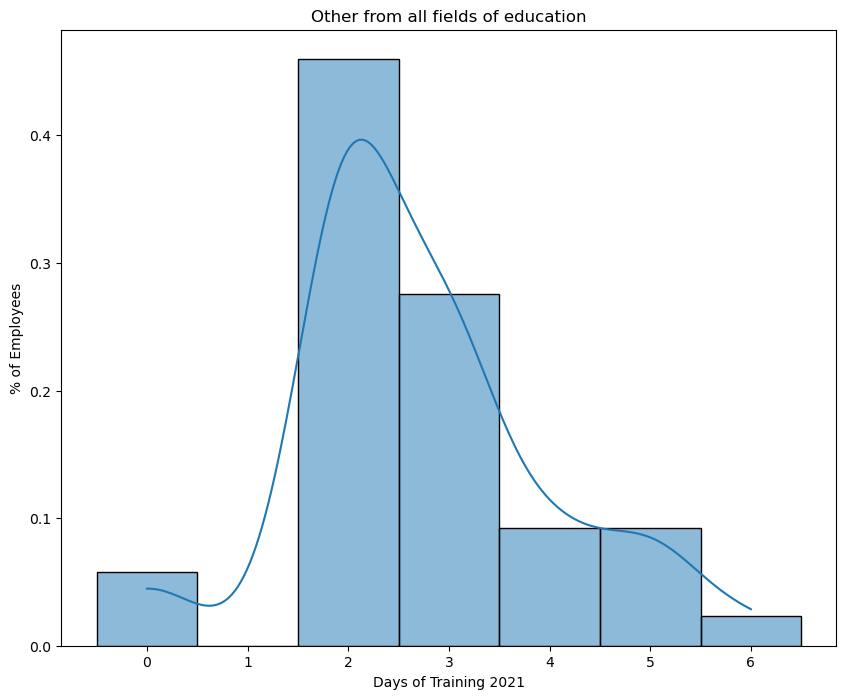

In [36]:
# setting up conditions for access into feature JobRole to get observations of all Other
other_condition = df_from_sql['JobRole'] == 'Other'

# creating a filtered data frame
filtered_df2 = df_from_sql[other_condition & training_condition & education_condition & attrition_condition]

# figure(size, resolution) of the window that the resulting plot will fit into
plt.figure(figsize=(10,8))

# create a histogram using kde = True and stat = 'density'
sns.histplot(data = filtered_df2, x = 'TrainingTimesLastYear', 
             discrete = True, stat='density', kde=True, palette = 'Set2')
plt.xlabel('Days of Training 2021')
plt.ylabel('% of Employees')
plt.title('Other from all fields of education')

- ### Insight: Right-Skewed (positive) and Right tailed Distribution

#### REASON FOR USING DENSITY PLOTS:
#### Density
- #### *setting density=True in the hist function call normalizes the histogram so that the area under the histogram sums to 1.*
#### Kernel Density Estimate
- #### *KDE provides a non-parametric way to estimate the shape of the distribution of a variable without assuming a specific distribution (e.g., normal, uniform).*
- #### *It can reveal features in the data that are not apparent in a histogram, such as multiple peaks or skewness.*

- ## 2.c. creating plots that give insight into key features Job Role and Level of Education:
    - ### Level of Education = 1 

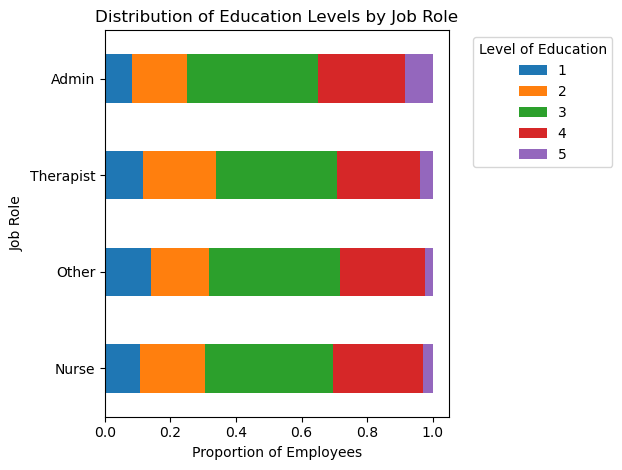

In [40]:
# create a plot that gives insight into key feature Job Role
dfJobRole2 = df_main.groupby('JobRole')['LevelOfEducation'].value_counts(normalize=True).unstack()

# Setting 'JobRole' as the index
df_reset3 = dfJobRole2.reindex(df_main['JobRole'].unique())

# Plotting horizontal bar chart
df_reset3.plot(kind='barh', stacked=True)

# Adding labels and title
plt.xlabel('Proportion of Employees')
plt.ylabel('Job Role')
plt.title('Distribution of Education Levels by Job Role')

# Showing the plot
plt.legend(title='Level of Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### *Normalising the JobRole feature reveals that for a level 1 Diploma: Other and Therapist job Roles have greater number of employees than Nurse and Admin*

- ## 2.d. creating plots that give insight into key features Department and Level of Education:
    - ### Level of Education = 1 

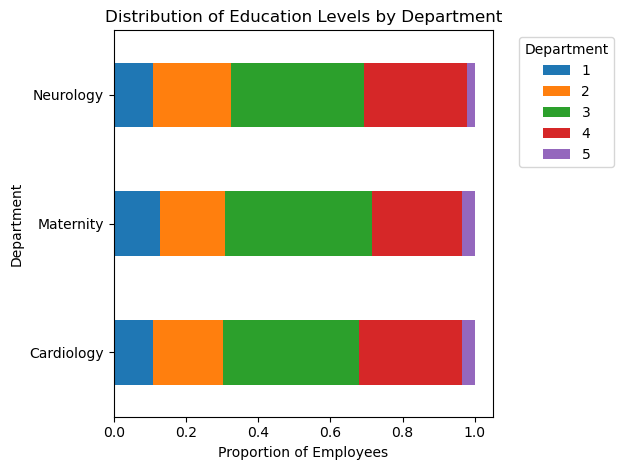

In [43]:
# create a plot that gives insight into key feature Department
dfDepartment = df_main.groupby('Department')['LevelOfEducation'].value_counts(normalize=True).unstack()

# # reset the index in order to access the Job Role column
# df_reset4 = dfDepartment.reset_index()

# # draw pie chat 
# plt.barh(df_reset4[1], df_reset4['Department'])
# plt.axis('equal')
# plt.title('Normalised % of employees per Department with a Level 1 Diploma')
# plt.show()
# Setting 'Department' as the index
df_reset4 = dfDepartment.reindex(df_main['Department'].unique())

# Plotting horizontal bar chart
df_reset4.plot(kind='barh', stacked=True)

# Adding labels and title
plt.xlabel('Proportion of Employees')
plt.ylabel('Department')
plt.title('Distribution of Education Levels by Department')

# Showing the plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### *Normalising the Department feature reveals that for a level 1 Diploma: Maternity Departments have greater number of employees than Cardiology and Neurology*

- #### Insight:
    - ##### Education level of 5 (i.e. the number of employees with a degree) seems to be the least overall within the Job Role and Department features

- ## 2.e. creating plots that give insight into key features Monthly Income and Education Level

Text(0.5, 1.0, 'Watson Healthcare 2022')

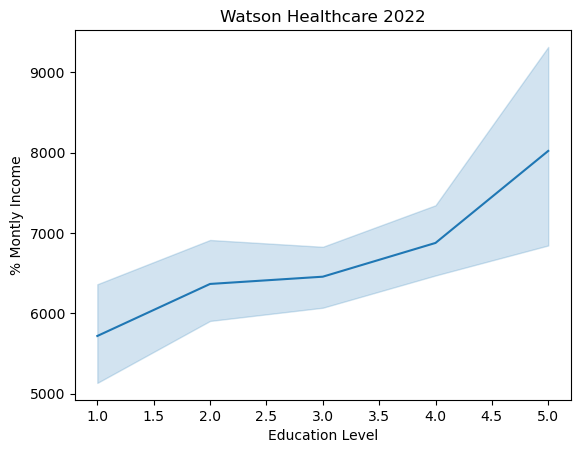

In [47]:
# create a line plot to observe the relationship between MonthlyIncome and Education
sns.lineplot(x='LevelOfEducation', y='MonthlyIncome', data=df_main)
plt.xlabel('Education Level')
plt.ylabel('% Montly Income')
plt.title('Watson Healthcare 2022')

- ## 2.f. creating plots that give insight into key features Monthly Income and Education Level

Text(0.5, 1.0, 'Watson Healthcare 2022')

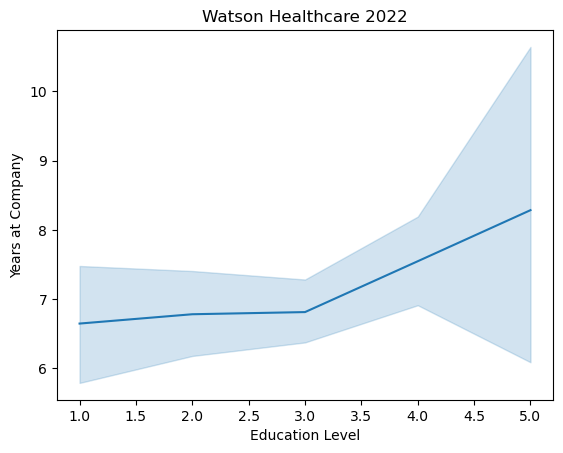

In [49]:
# Normalize 'YearsAtCompany' column
scaler = MinMaxScaler()
df_main['Normalized_Years'] = scaler.fit_transform(df_main[['YearsAtCompany']])

# create a line plot to observe the relationship between YearsAtCompany and LevelOfEducation
sns.lineplot(x='LevelOfEducation', y='YearsAtCompany', data=df_main)
plt.xlabel('Education Level')
plt.ylabel('Years at Company')
plt.title('Watson Healthcare 2022')

- #### Insight:
    - ##### For an education level of 5 (i.e. number of employees with a Degree) there seems to be the greatest monthly income and also the greatest number of years at the company

- ## 2.g. creating a plot that gives insight into relationship between Years At Company and Monthly Income

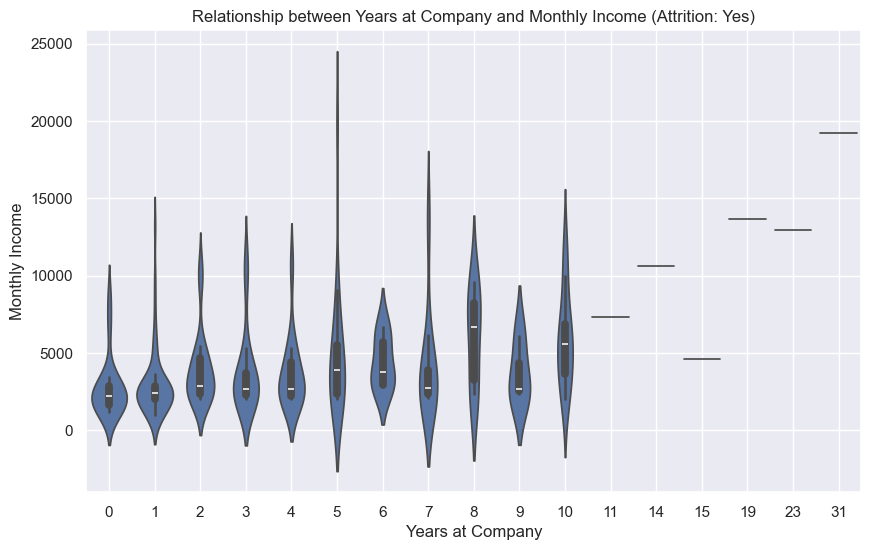

In [52]:
# Plotting the strip plot
plt.figure(figsize=(10, 6))
# Filter data for Attrition == 'Yes'
filtered_data_Yes1 = df_main.query("Attrition == 'Yes'")

# setting theme to darkgrid to make the data points stand out more vividly
sns.set_theme(style="darkgrid")

# create a scatterplot-like chart that displays data vertically in a single dimension.
sns.violinplot(x="YearsAtCompany", y="MonthlyIncome", data=filtered_data_Yes1)
plt.title('Relationship between Years at Company and Monthly Income (Attrition: Yes)')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()

- #### Insight:
    - ##### The distribution of data per year would be more insightful if the YearsAtCompany values were discretised

C:\Users\3sthe\AppData\Local\Temp\ipykernel_20136\62261957.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_Yes1['YearsAtCompany_equal_freq_bins'] = pd.qcut(filtered_data_Yes1['YearsAtCompany'], q=bins, labels=False)


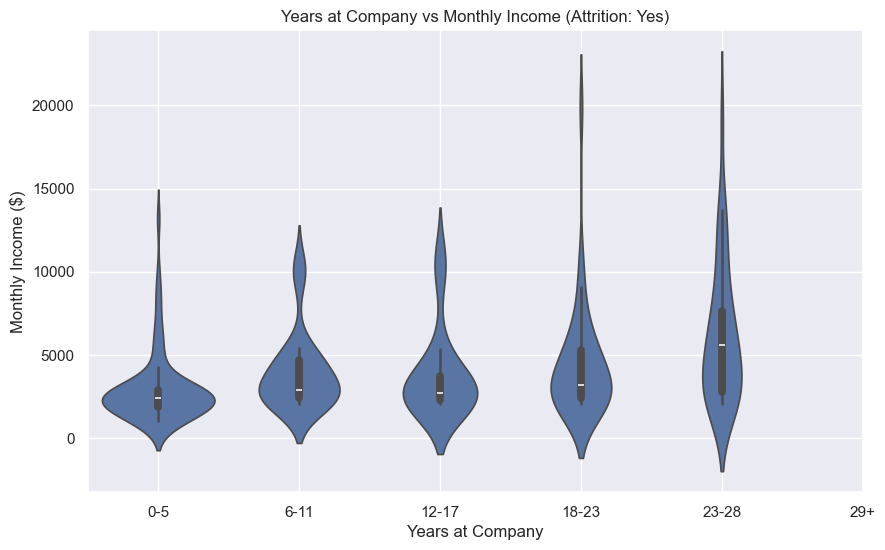

In [54]:
# Plotting the strip plot
plt.figure(figsize=(10, 6))
# Filter data for Attrition == 'Yes'
filtered_data_Yes1 = df_main.query("Attrition == 'Yes'")

# setting theme to darkgrid to make the data points stand out more vividly
sns.set_theme(style="darkgrid")

# Equal width binning
# calculate the range 'r'
r = filtered_data_Yes1['YearsAtCompany'].max() - filtered_data_Yes1['YearsAtCompany'].min()

# create variable bins to determine width frequency
bins = round(r/6)

# creating a new column in filtered data frame which discretises the YearsAtCompany column into equal frequency bins
filtered_data_Yes1['YearsAtCompany_equal_freq_bins'] = pd.qcut(filtered_data_Yes1['YearsAtCompany'], q=bins, labels=False)

# create a scatterplot-like chart that displays data vertically in a single dimension.
sns.violinplot(x="YearsAtCompany_equal_freq_bins", y="MonthlyIncome", data=filtered_data_Yes1)
# giving a title to the scatter plot
plt.title('Years at Company vs Monthly Income (Attrition: Yes)')
# labelling the x axis
plt.xlabel('Years at Company')
# labelling the y-axis
plt.ylabel('Monthly Income ($)')
# label the x-axis using ticks from knowledge of domain of x-axis is 'r': 31 (rounded to 30) broken up into 5 bins (bins=bins)
plt.xticks([0,1,2,3,4,5],['0-5', '6-11', '12-17', '18-23', '23-28', '29+'])
# format the plot to feature a grid
plt.grid(True)
plt.show()

- ### Insight:
    - #### According to the MonthlyIncome boxplot, where attrition is 'yes', and the YearsAtCompany vs. MonthlyIncome violin plot, outliers are above the 0.4% normalised Monthly Income mark which equivalates to 8k out of 20k. This also means that more employees who have turned over on average were earning less than 8k per month.
    - #### According to the YearsAtCompany vs. MonthlyIncome violins, there seems to be a Monthly Income concentrated within the 0-5 bin of Years at Company
***

### 3. Pearson Correlation Coefficient

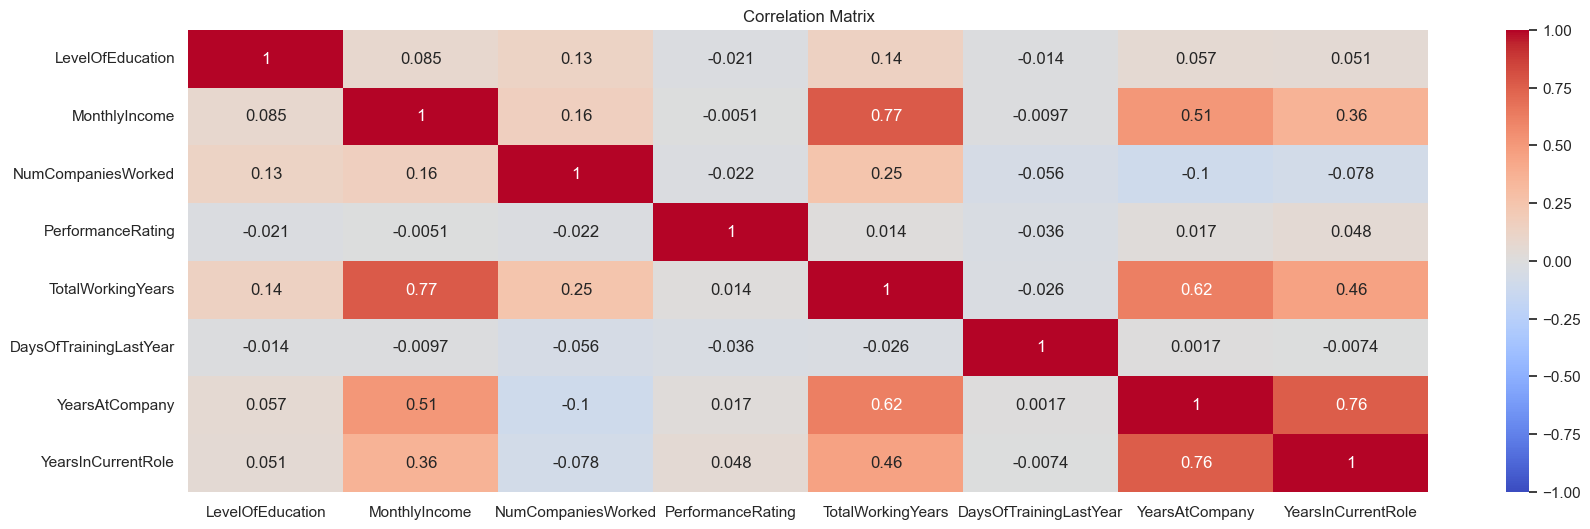

In [57]:
# Select columns with integer data type
int_columns = df_main.select_dtypes(include='int64') 
df_int_columns = df_main[int_columns.columns]

# Compute correlation matrix for all features
corrMatr = df_int_columns.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(corrMatr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### Insight: There seems to be more grey area in total than the total red area. This shows that there are weaker levels of correlation between each feature in this dataset.

### 3.a. Understanding the correlation between key features
- ### Level of Education vs. Days of training last year

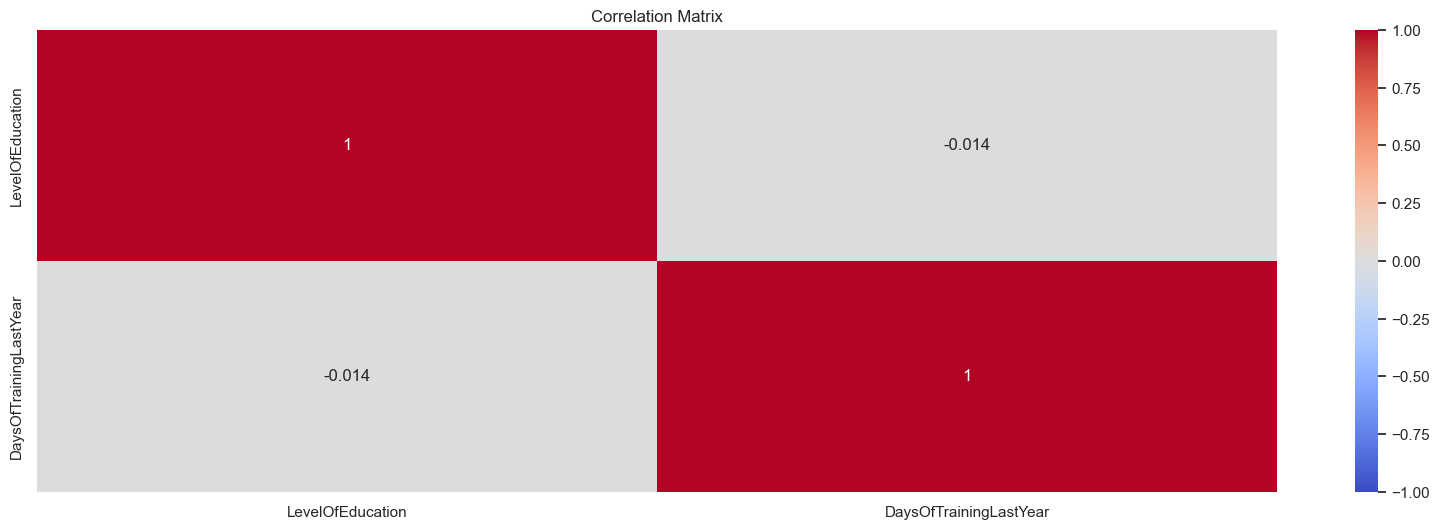

In [60]:
# Compute correlation matrix for DaysOfTrainingLastYear and LevelOfEducation
corrMatr = df_main[['LevelOfEducation', 'DaysOfTrainingLastYear']].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(corrMatr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### Insight: It seems to be clear that there is a weak correlation between Days of Training and Level of Education when observing the contrast between the grey color and the red color.

### 3.b. Understanding the correlation between key features
- ### Monthly income vs. Total working years

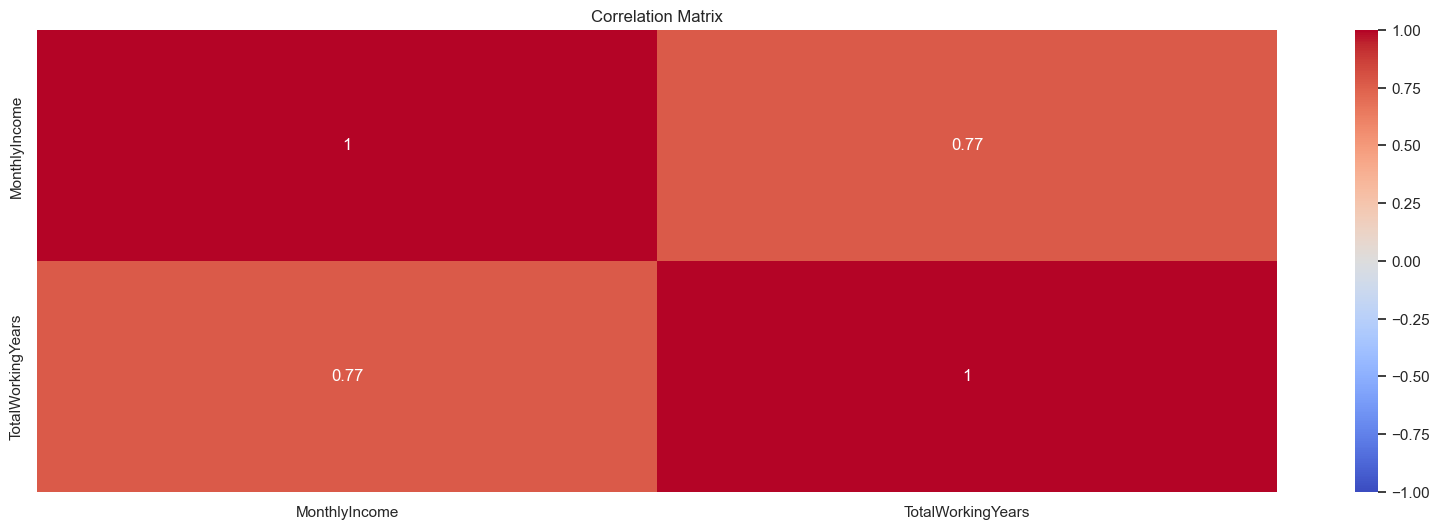

In [63]:
# Compute correlation matrix for DaysOfTrainingLastYear and LevelOfEducation
corrMatr = df_main[['MonthlyIncome', 'TotalWorkingYears']].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(corrMatr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### Insight: It seems to be clear that there is a strong correlation between Monthly icome and Total working years when observing the similarity between each shade of red.